In [1]:
#@title Import modules
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [2]:
train_df=pd.read_csv('california_housing_train.csv')
test_df=pd.read_csv('california_housing_test.csv')

In [3]:
(train_df.median_house_value)

0        66900.0
1        80100.0
2        85700.0
3        73400.0
4        65500.0
          ...   
16995   111400.0
16996    79000.0
16997   103600.0
16998    85800.0
16999    94600.0
Name: median_house_value, Length: 17000, dtype: float64

In [4]:
scale_factor = 1000.0

# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

In [5]:
train_df.median_house_value

0        66.9
1        80.1
2        85.7
3        73.4
4        65.5
         ... 
16995   111.4
16996    79.0
16997   103.6
16998    85.8
16999    94.6
Name: median_house_value, Length: 17000, dtype: float64

In [6]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model               


def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""
  
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history   

print("Defined the build_model and train_model functions.")


Defined the build_model and train_model functions.


In [7]:
#@title Define the plotting function

def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


Epoch 1/30
155/155 [==============================] - 1s 3ms/step - loss: 39774.3359 - root_mean_squared_error: 199.4351 - val_loss: 28549.4355 - val_root_mean_squared_error: 168.9658
Epoch 2/30
155/155 [==============================] - 0s 2ms/step - loss: 21034.1133 - root_mean_squared_error: 145.0314 - val_loss: 13907.0283 - val_root_mean_squared_error: 117.9281
Epoch 3/30
155/155 [==============================] - 0s 2ms/step - loss: 10347.8740 - root_mean_squared_error: 101.7245 - val_loss: 7432.3784 - val_root_mean_squared_error: 86.2112
Epoch 4/30
155/155 [==============================] - 0s 3ms/step - loss: 7158.9912 - root_mean_squared_error: 84.6108 - val_loss: 6869.4844 - val_root_mean_squared_error: 82.8824
Epoch 5/30
155/155 [==============================] - 0s 2ms/step - loss: 7029.5088 - root_mean_squared_error: 83.8422 - val_loss: 6870.8701 - val_root_mean_squared_error: 82.8907
Epoch 6/30
155/155 [==============================] - 0s 2ms/step - loss: 7029.9263 - root

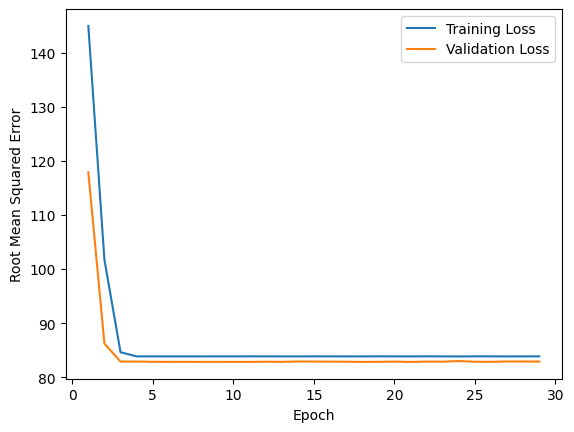

In [8]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.09

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))
# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model,shuffled_train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

In [9]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 1ms/step - loss: 7009.8315 - root_mean_squared_error: 83.7247


In [10]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 2ms/step - loss: 7009.8315 - root_mean_squared_error: 83.7247


In [11]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 2ms/step - loss: 7009.8315 - root_mean_squared_error: 83.7247


In [12]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 3ms/step - loss: 7009.8315 - root_mean_squared_error: 83.7247
